In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Assuming your file is named 'example.csv'
df = pd.read_csv('logistic_regression.csv')


In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [50]:
df['loan_status'].value_counts()/len(df)*100

loan_status
1    80.387092
0    19.612908
Name: count, dtype: float64

In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Check for Duplicate values

In [9]:
df.duplicated().sum()

0

### Heatmap

In [10]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create a new DataFrame with only numerical columns
numerical_df = df[numerical_columns]

In [11]:
corr_matrix = numerical_df.corr(method='spearman')

In [12]:
mask = ~pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool), index=corr_matrix.index, columns=corr_matrix.columns)

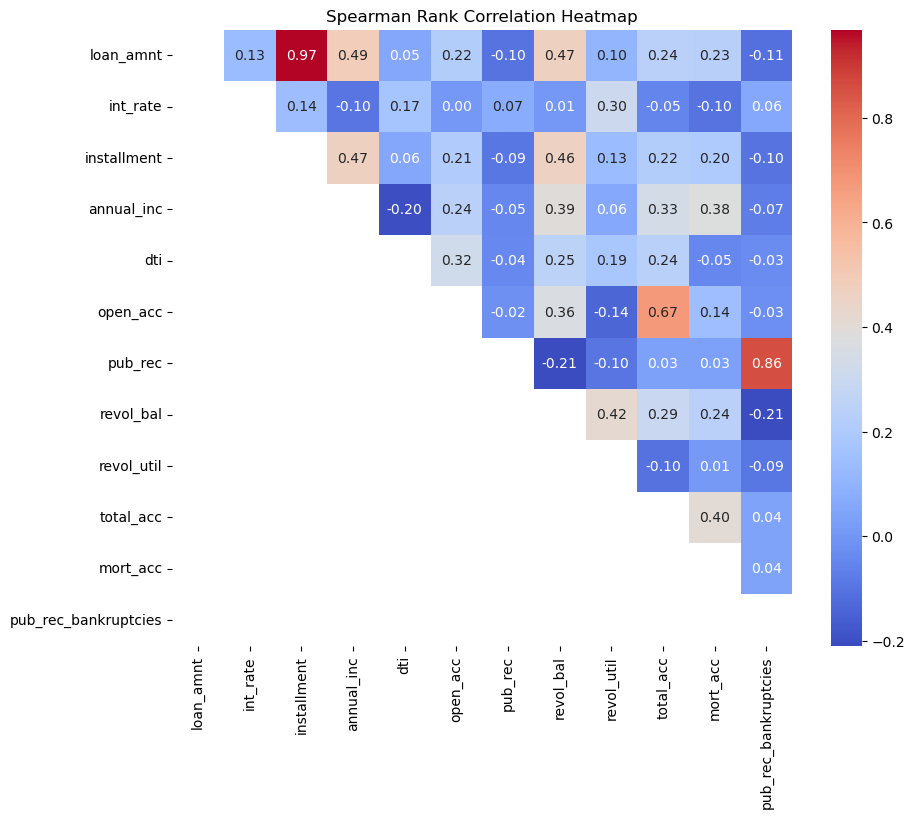

In [13]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

<Axes: xlabel='term', ylabel='count'>

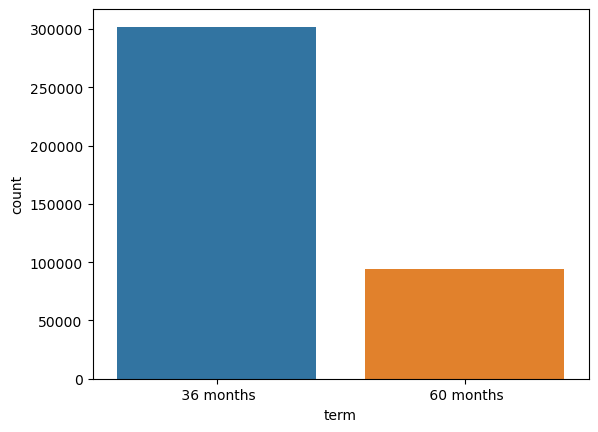

In [14]:
sns.countplot(x = 'term', data = df)

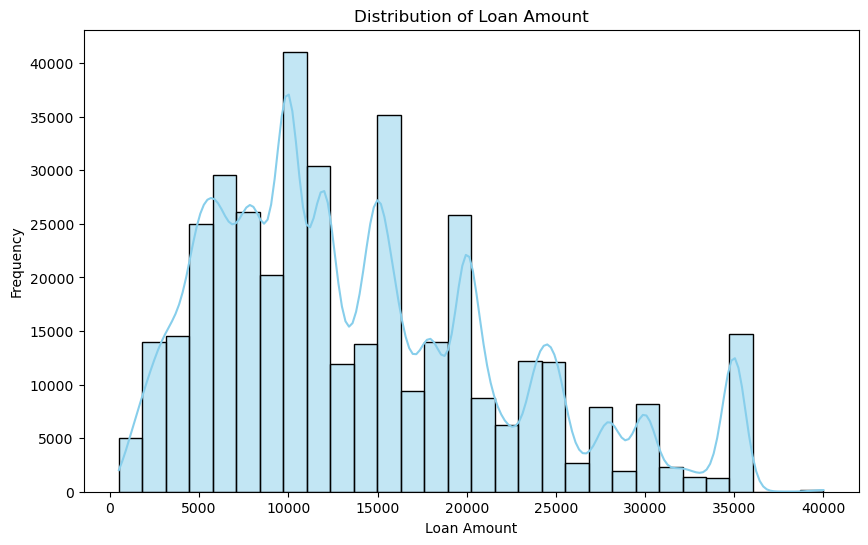

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

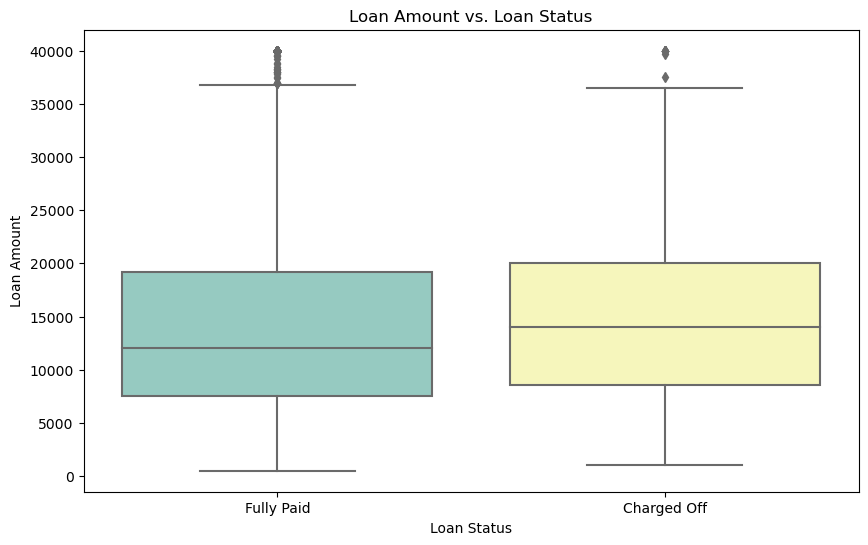

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set3')
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

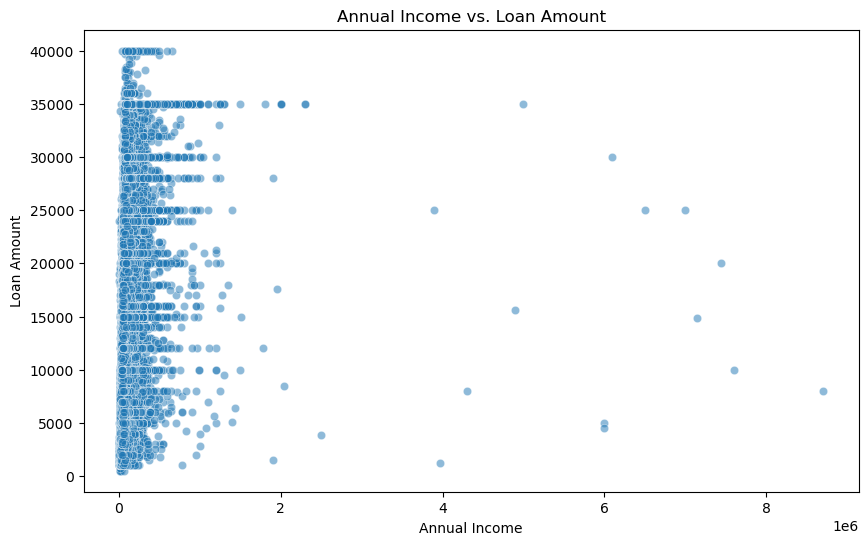

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df, alpha=0.5)
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

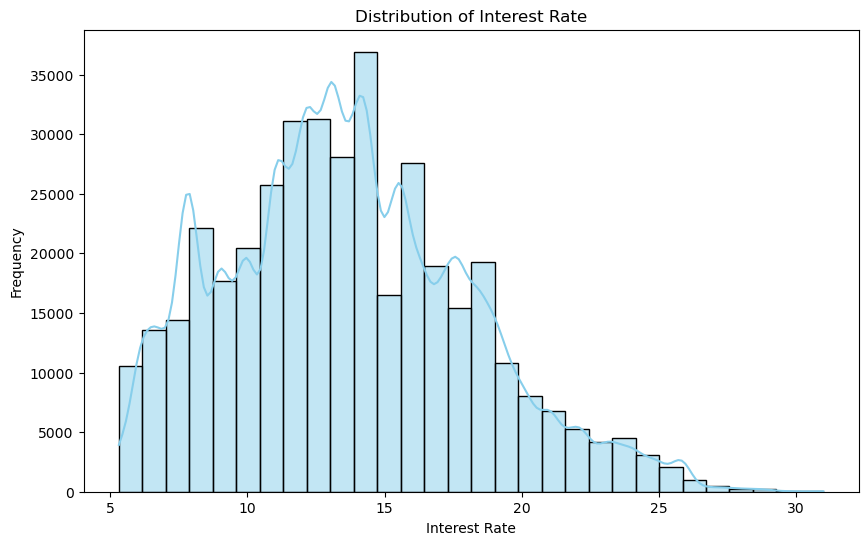

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

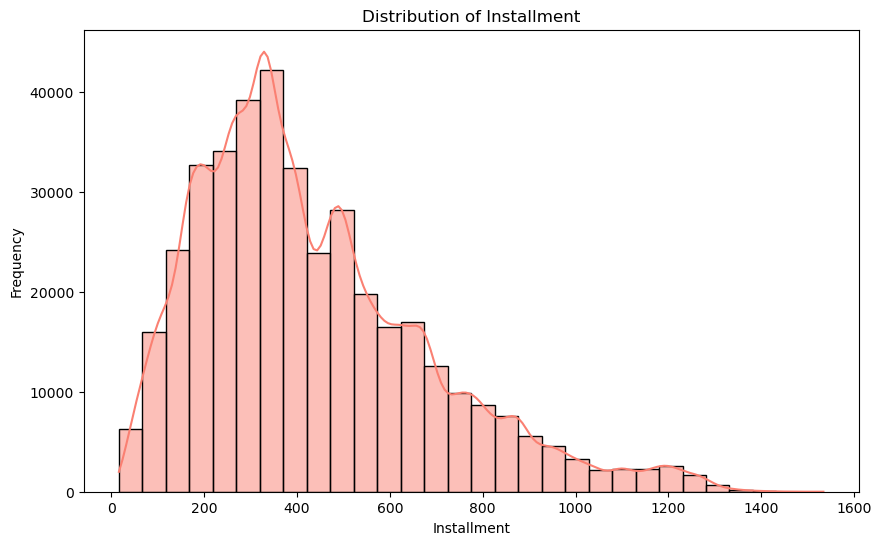

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['installment'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

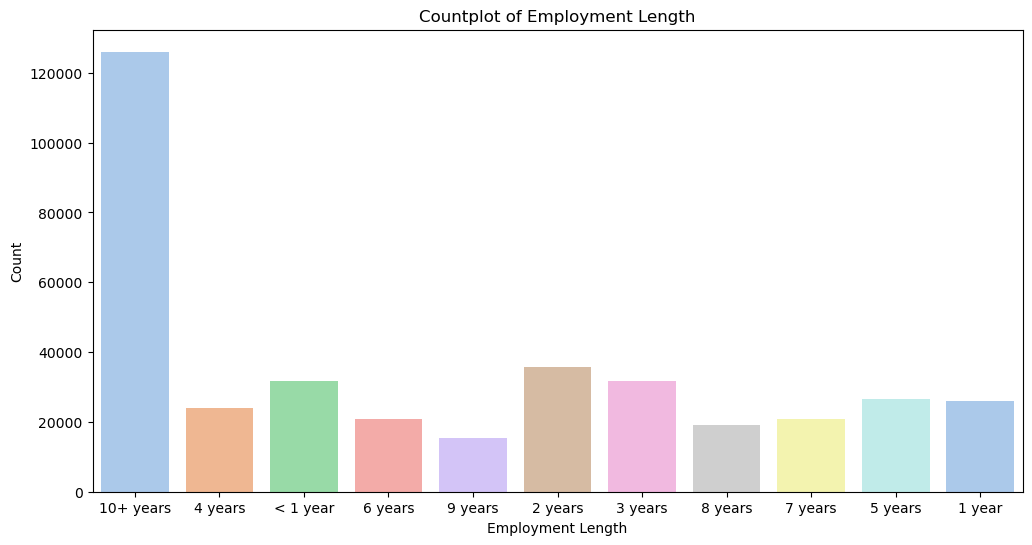

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', data=df, palette='pastel')
plt.title('Countplot of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

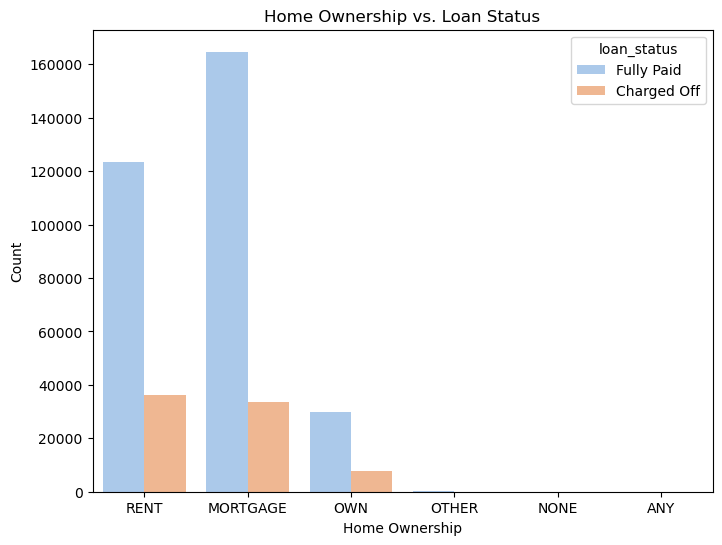

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df, palette='pastel')
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


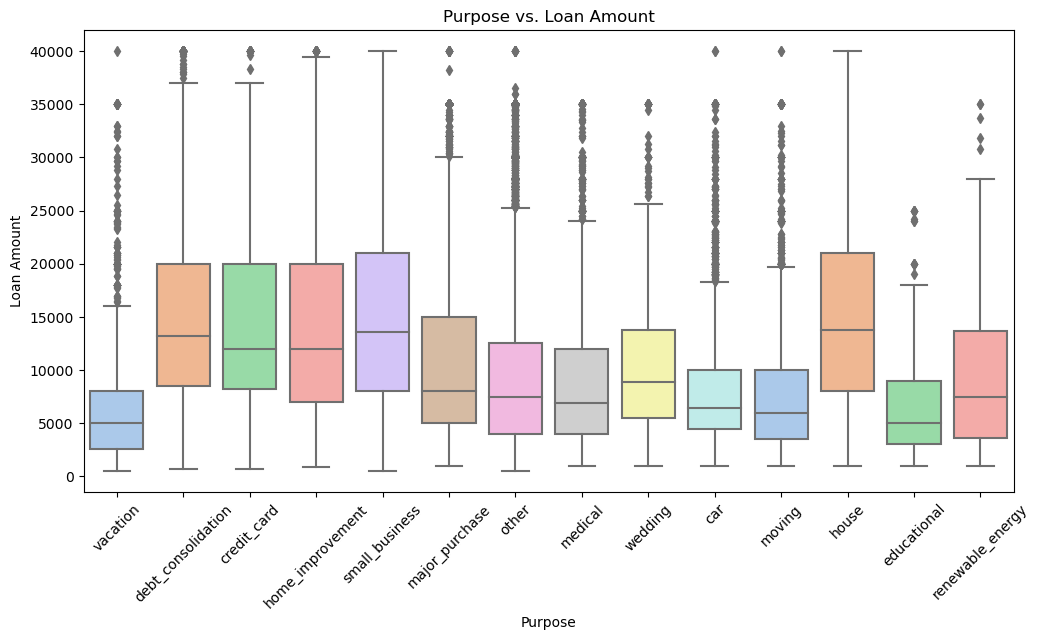

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=df, palette='pastel')
plt.title('Purpose vs. Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Capping Outliers

In [23]:
 numerical_columns = df.select_dtypes(include=['number'])

for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)

    # Cap outliers
    df[col] = df[col].clip(lower=lower_threshold, upper=upper_threshold)

### Imputing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [25]:
import pandas as pd
from fancyimpute import IterativeImputer

numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

imputer = IterativeImputer()
df_imputed_numerical = pd.DataFrame(imputer.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Rejoin imputed numerical columns with original categorical columns
df_imputed = pd.concat([df_imputed_numerical, df[categorical_columns]], axis=1)

In [26]:
# Impute missing values in categorical columns with mode
df_categorical_imputed = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Concatenate imputed categorical columns with imputed numerical columns
df = pd.concat([df_imputed_numerical, df_categorical_imputed], axis=1)

In [28]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


### Feature Engineering


In [29]:
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)

### Label Encoding and Scaling

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [31]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled_numerical = pd.DataFrame(standard_scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df =  pd.concat([df_scaled_numerical, df[categorical_columns]], axis=1)

### Logistic Regression

In [32]:
X = df.drop('loan_status', axis=1) 
y = df['loan_status']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)


# Fit the model on the training data
logistic_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7991440042421029


In [42]:

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display the coefficients with column names
coefficients_df = pd.DataFrame({'Feature': ['Intercept'] + list(feature_names),
                                'Coefficient': [logistic_reg.intercept_[0]] + list(logistic_reg.coef_[0])})

# Display the DataFrame
print(coefficients_df)


                 Feature  Coefficient
0              Intercept     0.001975
1              loan_amnt    -0.002247
2               int_rate    -0.011887
3            installment    -0.001445
4             annual_inc     0.004350
5                    dti    -0.006096
6               open_acc    -0.000930
7                pub_rec     0.000000
8              revol_bal     0.000590
9             revol_util    -0.003728
10             total_acc     0.001262
11              mort_acc     0.003592
12  pub_rec_bankruptcies     0.000000
13                  term    -0.002930
14                 grade    -0.012685
15             sub_grade    -0.060430
16             emp_title     0.000003
17            emp_length     0.006638
18        home_ownership    -0.000625
19   verification_status    -0.000931
20               issue_d     0.007607
21               purpose     0.000018
22                 title     0.000028
23      earliest_cr_line     0.001271
24   initial_list_status     0.000845
25      appl

ROC AUC Score: 0.6133071375661765


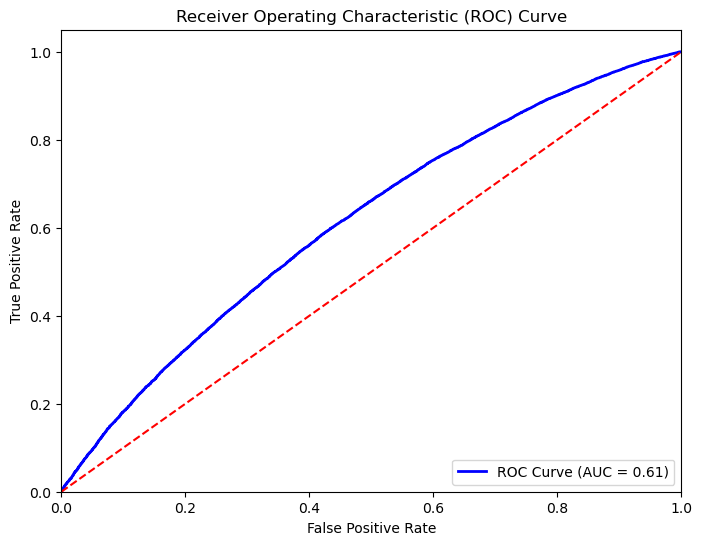

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC score
y_pred_proba = logistic_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Average Precision Score: 0.8555102718179897


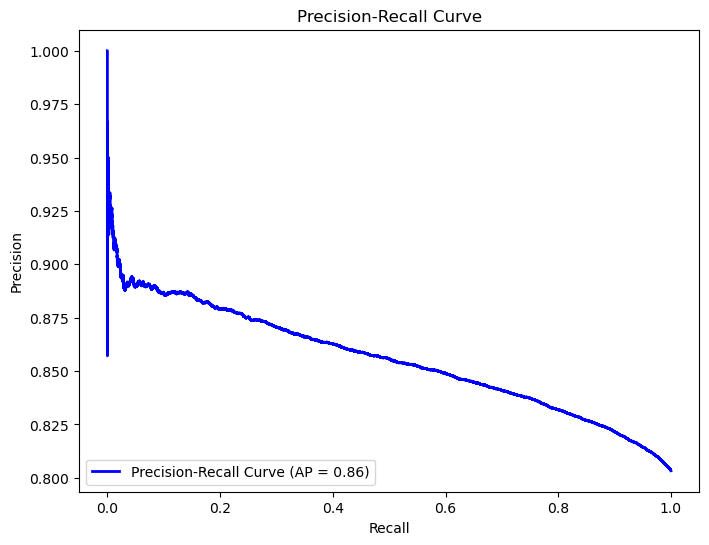

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred_proba)
print("Average Precision Score:", avg_precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.05      0.08     15577
           1       0.81      0.98      0.89     63629

    accuracy                           0.80     79206
   macro avg       0.61      0.51      0.48     79206
weighted avg       0.73      0.80      0.73     79206


Confusion Matrix:
[[  715 14862]
 [ 1047 62582]]


### Tradeoff Question 1: How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

To ensure that our model detects real defaulters while minimizing false positives, we can adjust the classification threshold. By default, logistic regression (and most classification models) uses a threshold of 0.5, meaning that if the predicted probability of default is greater than 0.5, the model predicts a positive (defaulter) label.

To reduce false positives (and potentially increase false negatives), we can increase the threshold. This will make the model more conservative in predicting default, reducing the likelihood of falsely classifying non-defaulters as defaulters. However, this may also result in missing some true defaulters (false negatives).

We can find the optimal threshold by analyzing the ROC curve or precision-recall curve and selecting the point that balances the trade-off between true positives and false positives according to our business requirements. Additionally, techniques like cost-sensitive learning or adjusting class weights can be used to explicitly prioritize reducing false positives.

### Tradeoff Question 2: Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

To play safe and minimize the risk of non-performing assets (NPAs), we can adopt a more conservative approach in lending decisions. This could involve setting a higher threshold for approving loans, which means only approving loans for individuals with a very low predicted probability of default. While this may result in rejecting potentially profitable loan applications, it reduces the risk of lending to individuals who may default.

Additionally, we can implement stricter eligibility criteria for loan approval, conduct more thorough credit assessments, and incorporate additional risk factors into the model to improve its predictive accuracy. Regular monitoring of loan portfolios and proactive measures to address potential defaults can also help mitigate the risk of NPAs.

Overall, balancing the need for profitability with the imperative to minimize NPAs requires a nuanced approach, where risk management strategies are tailored to the specific goals and risk tolerance of the lending institution.

### Recommendations and actionable insights
Feature Importance: Analyze the coefficients of the logistic regression model to identify the most influential features in predicting loan defaults. Focus on these features for further investigation and risk management strategies.

Model Threshold Optimization: Utilize the ROC curve or precision-recall curve to identify the optimal classification threshold that balances the trade-off between identifying true defaulters and minimizing false positives. Adjust the threshold accordingly to meet the organization's risk appetite and business objectives.

Risk Segmentation: Segment the loan portfolio based on predicted default probabilities. Classify borrowers into low-risk, medium-risk, and high-risk categories and implement tailored strategies for each segment. For example, offer lower interest rates or higher loan amounts to low-risk borrowers while implementing stricter eligibility criteria for high-risk borrowers.

Continuous Monitoring: Regularly monitor the performance of the model and loan portfolio to detect changes in risk profiles and emerging trends. Implement mechanisms for early warning signals of potential defaults and take proactive measures to mitigate risks.

Enhanced Due Diligence: Strengthen the underwriting process by incorporating additional risk factors and conducting more comprehensive credit assessments. Consider alternative data sources, such as social media activity or transaction history, to supplement traditional credit scoring models.

Customer Education: Educate borrowers about the importance of responsible financial behavior and the consequences of default. Provide resources and support to help borrowers manage their finances effectively and avoid defaulting on their loans.

Collaborative Partnerships: Collaborate with regulatory authorities, credit bureaus, and industry peers to share best practices, exchange data, and enhance risk management capabilities. Participate in industry forums and working groups to stay informed about regulatory developments and industry trends.

By implementing these actionable insights and recommendations, the lending institution can improve its risk management practices, optimize loan approval decisions, and minimize the impact of non-performing assets on its financial performance and reputation.

### Questionnaire 
1)What percentage of customers have fully paid their Loan Amount?
80.38% of customers have fully paid their loan

2)Comment about the correlation between Loan Amount and Installment features.
A correlation coefficient would quantify the relationship between loan amount and installment. A strong positive correlation would indicate that as the loan amount increases, so does the installment size, which is what we would typically expect.

3)The majority of people have home ownership as _:
Based on the provided bar chart titled "Home Ownership vs. Loan Status," the majority of people have "MORTGAGE" as their home ownership status.

4)People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Percentage of fully paid loans among customers with grade 'A': 16.46%
Overall percentage of fully paid loans: 82.77%
People with grades 'A' are more likely to fully pay their loan: False

5)Name the top 2 afforded job titles.
Teacher    4389
Manager    4250

Thinking from a bank's perspective, which metric should our primary focus be on:
From a bank's perspective, all the listed metrics are important, but the focus often depends on the bank's objectives:
ROC AUC: Useful for evaluating the overall performance of a binary classifier and its ability to distinguish between classes.
Precision: Important if the cost of false positives is high (e.g., offering a loan to someone who will default).
Recall: Important if the cost of false negatives is high (e.g., denying a loan to someone who would have repaid it).
F1 Score: Useful if you need a balance between precision and recall, especially if there is an uneven class distribution.

How does the gap in precision and recall affect the bank?
A large gap between precision and recall signifies a trade-off. High recall but low precision could mean many defaulters are approved (leading to losses), while high precision but low recall could mean potential good borrowers are denied (leading to lost revenue).

Which were the features that heavily affected the outcome?
int_rate and sub_grade, grade affected the outcome

Will the results be affected by geographical location? (Yes/No)
Yes, geographical location can affect loan outcomes due to varying economic conditions, cost of living, and lending regulations.